**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
#leemos el conjunto de datos que generamos en la Parte 1
melb_df = pandas.read_csv("https://github.com/pablogventura/diplodatos2022/raw/master/02_Exploracion_y_Curacion/kaggle_env.csv")

melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'environment_price'],
      dtype='object')

In [ ]:
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,environment_price
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,100.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,100.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,100.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,100.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,80.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,180.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,180.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,180.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


### Ejercicio 1

**Antes de codificar la variable categórica 'Suburb', analizamos la cantidad de registros que tiene cada suburbio, y nos quedamos con los 70 suburbios con mayor cantidad de registros, mientras que al resto lo categorizamos como "Other" en "Suburb". Esto lo hacemos para disminuir la cantidad de categorias y permitirnos ejecutar el notebook en la nube de Google Colab, ya que con todos los suburbs se agota la RAM.**

In [ ]:
melb_df.Suburb.value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [ ]:
main_suburbs = melb_df.Suburb.value_counts()
main_suburbs = main_suburbs.sort_values(ascending=False)[:70]#.tolist()
main_suburbs = main_suburbs.index.values.tolist()


In [ ]:
main_melb_df = melb_df[melb_df.Suburb.isin(main_suburbs)]
minor_melb_df = melb_df[-melb_df.Suburb.isin(main_suburbs)]
minor_melb_df["Suburb"] = "Other"
melb_df_chico = pandas.concat([main_melb_df, minor_melb_df])
minor_melb_df["Suburb"].value_counts()   #de 13580 habria 4564 bajo el Suburb "Other" que es 1/3 del total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Other    4564
Name: Suburb, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols=['Suburb','Type']
encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df_chico[categorical_cols])
# We can inspect the categories found by the encoder 
encoder.categories_

[array(['Airport West', 'Albert Park', 'Altona', 'Armadale', 'Ascot Vale',
        'Avondale Heights', 'Balwyn', 'Balwyn North', 'Bentleigh',
        'Bentleigh East', 'Brighton', 'Brighton East', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Burwood',
        'Camberwell', 'Carnegie', 'Coburg', 'Collingwood', 'Doncaster',
        'Elwood', 'Essendon', 'Fawkner', 'Fitzroy North', 'Footscray',
        'Glen Iris', 'Glenroy', 'Hampton', 'Hawthorn', 'Hawthorn East',
        'Heidelberg Heights', 'Heidelberg West', 'Ivanhoe', 'Keilor East',
        'Kensington', 'Kew', 'Maidstone', 'Malvern', 'Malvern East',
        'Maribyrnong', 'Moonee Ponds', 'Moorabbin', 'Murrumbeena',
        'Newport', 'Niddrie', 'North Melbourne', 'Northcote', 'Oak Park',
        'Ormond', 'Other', 'Pascoe Vale', 'Port Melbourne', 'Prahran',
        'Preston', 'Reservoir', 'Richmond', 'South Melbourne',
        'South Yarra', 'St Kilda', 'Sunshine', 'Sunshine North',
        'Sunshine West', 

In [ ]:
len(melb_df_chico)

13580

In [ ]:
categorias_codificadas = encoder.transform(melb_df_chico[categorical_cols])
categorias_codificadas

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

En este punto se pide el dataset sin las columnas 'BuildingArea' & 'YearBuilt'. Al ser variables numéricas no las consideramos al hacer OneHot encoding. Las eliminamos al final en **'melb_encoded_SIN'**.

In [ ]:
melb_encoded = pandas.DataFrame(numpy.hstack((melb_df_chico.values,categorias_codificadas)))
melb_encoded.columns =list(melb_df_chico.columns.tolist()) + list(encoder.get_feature_names_out())
melb_encoded_SIN = melb_encoded.drop(["BuildingArea", "YearBuilt"], axis=1)

melb_encoded


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Suburb_Surrey Hills,Suburb_Templestowe Lower,Suburb_Thornbury,Suburb_Toorak,Suburb_West Footscray,Suburb_Williamstown,Suburb_Yarraville,Type_h,Type_t,Type_u
0,Airport West,154 Halsey Rd,3,t,840000.0,PI,Nelson,3/09/2016,13.5,3042.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,3/12/2016,13.5,3042.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,4/03/2017,13.5,3042.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Airport West,23 Hart St,2,h,603000.0,S,Nelson,4/03/2017,13.5,3042.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Airport West,1/80 Hawker St,3,t,700000.0,S,Brad,4/03/2017,13.5,3042.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Other,15 Mara Cl,4,h,1330000.0,S,Barry,26/08/2017,14.7,3152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13576,Other,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13577,Other,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13578,Other,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

numeric_cols = ["Rooms","Price","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Propertycount","environment_price"]
numeric_cols += list(encoder.get_feature_names_out())

melb_imputed = melb_encoded.copy(deep=True)

imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5))
melb_imputed[['YearBuilt','BuildingArea']] = imputer.fit_transform(melb_imputed[['YearBuilt', 'BuildingArea']])
len(melb_imputed)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


13580

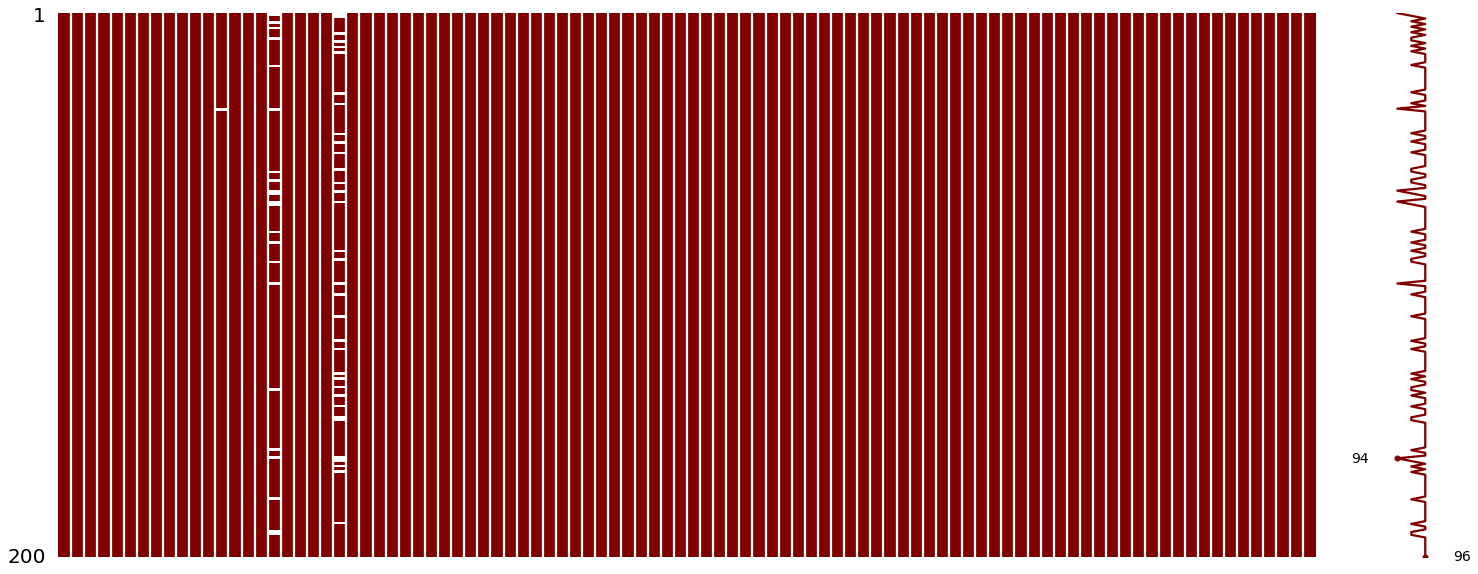

In [ ]:
import missingno as msno

msno.matrix(melb_imputed.sample(200), color=[0.5,0,0])

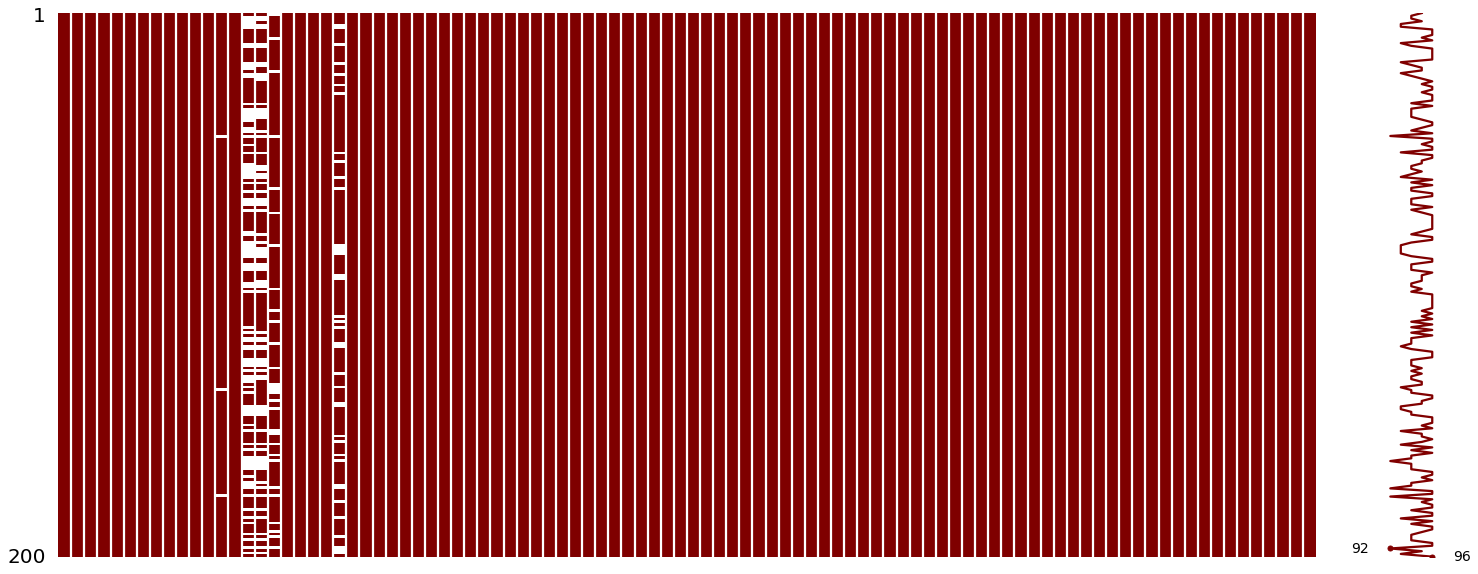

In [ ]:
msno.matrix(melb_encoded.sample(200), color=[0.5,0,0])

In [ ]:
melb_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 96 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Suburb                     13580 non-null  object
 1   Address                    13580 non-null  object
 2   Rooms                      13580 non-null  object
 3   Type                       13580 non-null  object
 4   Price                      13580 non-null  object
 5   Method                     13580 non-null  object
 6   SellerG                    13580 non-null  object
 7   Date                       13580 non-null  object
 8   Distance                   13580 non-null  object
 9   Postcode                   13580 non-null  object
 10  Bedroom2                   13580 non-null  object
 11  Bathroom                   13580 non-null  object
 12  Car                        13518 non-null  object
 13  Landsize                   13580 non-null  object
 14  Buildi

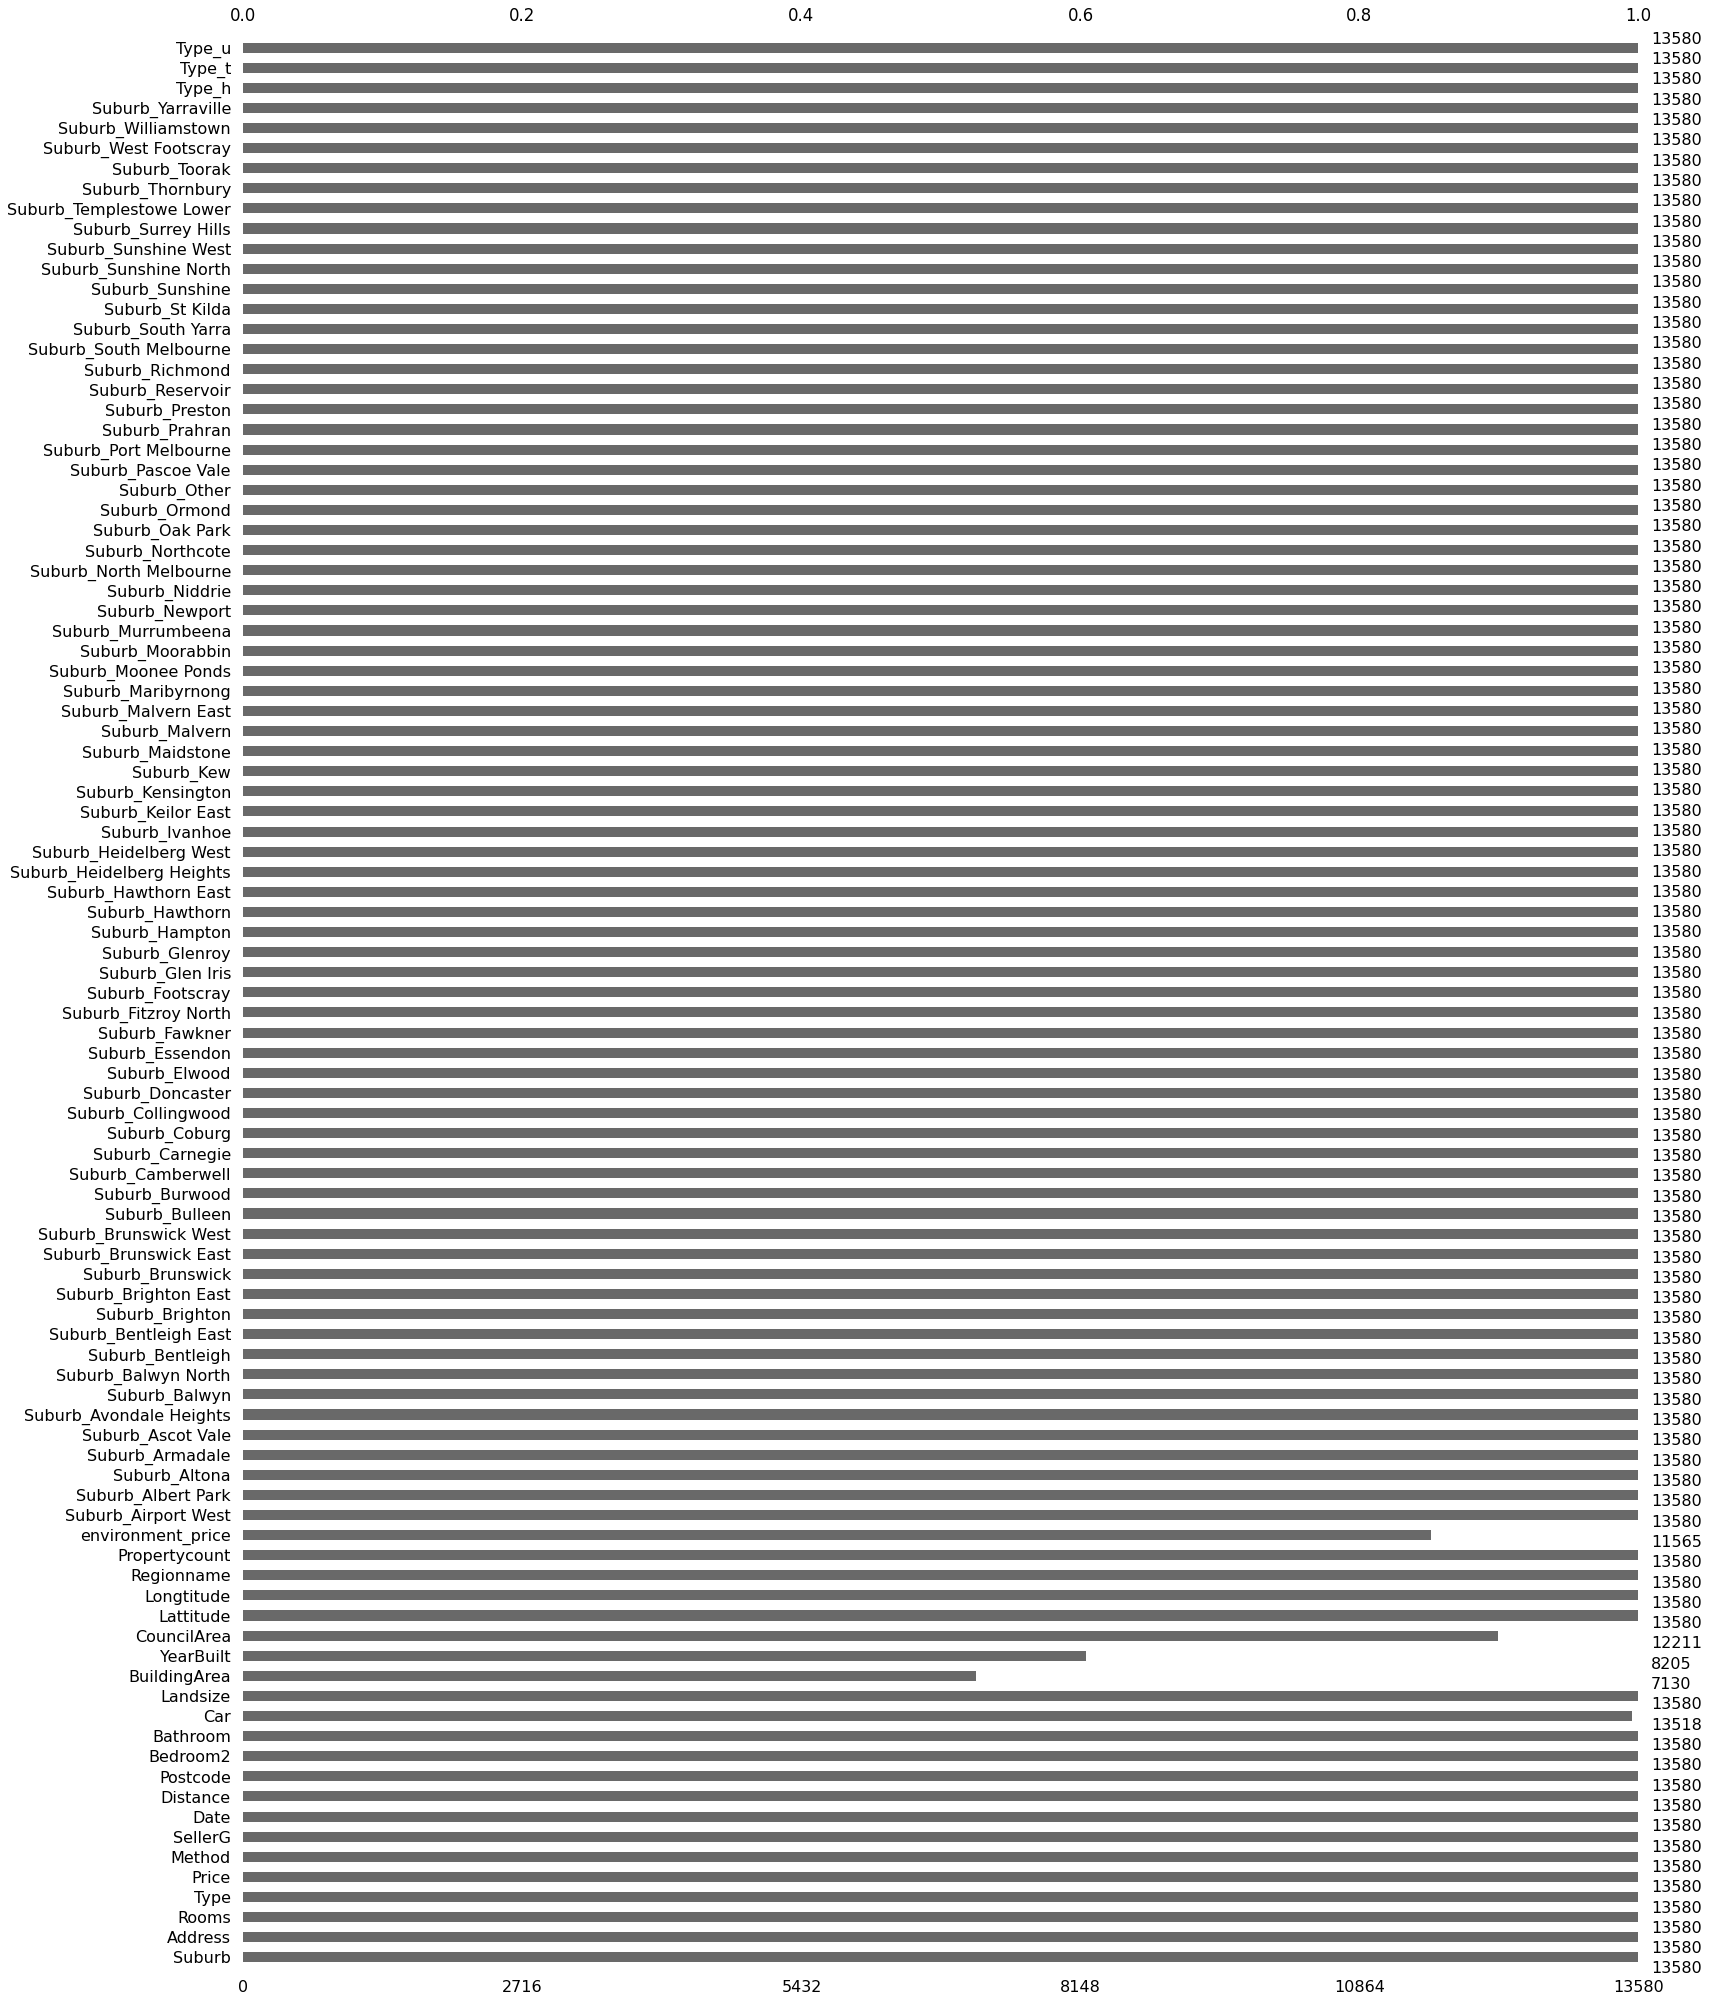

In [ ]:
import missingno as msno

msno.bar(melb_encoded)#,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

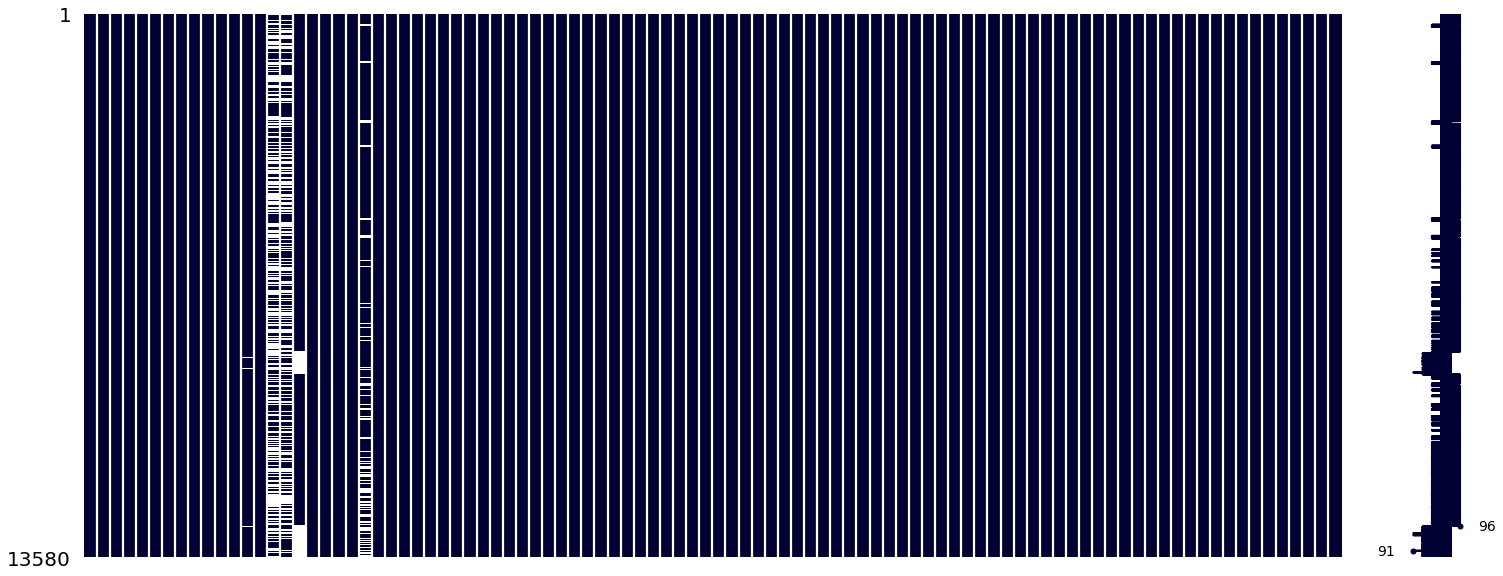

In [ ]:
msno.matrix(melb_encoded, color=[0,0,0.2])

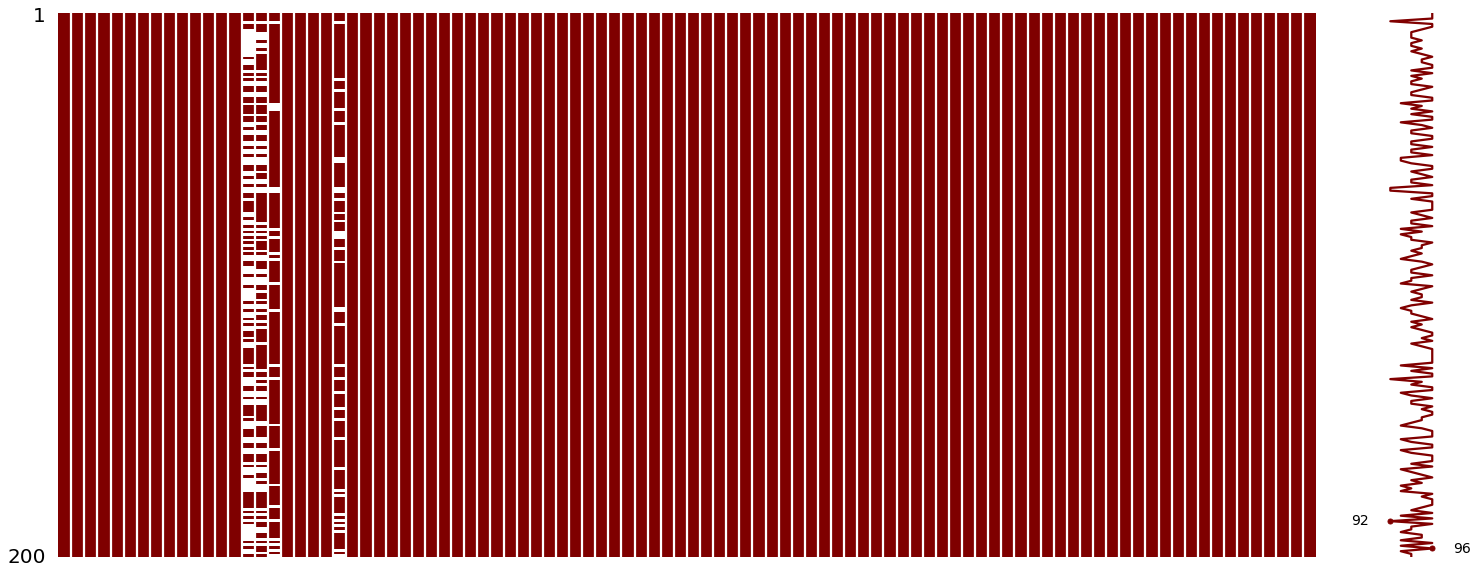

In [ ]:
msno.matrix(melb_encoded.sample(200), color=[0.5,0,0])

In [ ]:
melb_imputed_all = melb_encoded.copy(deep=True)
melb_imputed_all[numeric_cols]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Suburb_Surrey Hills,Suburb_Templestowe Lower,Suburb_Thornbury,Suburb_Toorak,Suburb_West Footscray,Suburb_Williamstown,Suburb_Yarraville,Type_h,Type_t,Type_u
0,3,840000.0,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,730000.0,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,770000.0,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,603000.0,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,700000.0,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1330000.0,14.7,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13576,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13577,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13578,3,582000.0,16.5,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

#KNN Imputer precisa que los datos esten estandarizados.
# Datos con diferentes escalas introducen valores de reemplazo sesgados 
#  Scikit-Learn’s MinMaxScaler escala las variables al [0,1].
numeric_cols = ["Rooms","Price","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Propertycount","environment_price"]
numeric_cols += list(encoder.get_feature_names_out())

scaler = MinMaxScaler()
melb_imputed_all = melb_encoded.copy(deep=True)
melb_imputed_all = scaler.fit_transform(melb_imputed_all[numeric_cols])
melb_imputed_all
imputer = IterativeImputer(estimator=KNeighborsRegressor())
melb_imputed_all = imputer.fit_transform(melb_imputed_all)
melb_imputed_all = scaler.inverse_transform(melb_imputed_all)

melb_imputed_all = pandas.DataFrame(melb_imputed_all, index=melb_encoded[numeric_cols].index, columns=melb_encoded[numeric_cols].columns)
(len(melb_imputed_all),len(melb_encoded))

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


(13580, 13580)

3) En los siguientes gráficos se muestra la comparación de las distribuciones de las variables 'YearBuilt' & 'BuildingArea' obtenidas con cada método de imputación.

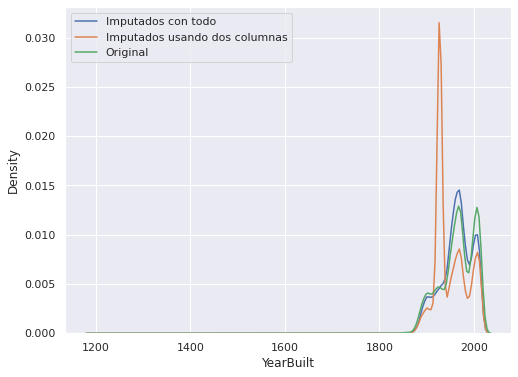

In [ ]:
seaborn.set(rc={'figure.figsize':(8,6)})
ax = seaborn.kdeplot(melb_imputed_all.YearBuilt,label="Imputados con todo")
ax = seaborn.kdeplot(melb_imputed.YearBuilt,label="Imputados usando dos columnas")
ax = seaborn.kdeplot(melb_encoded.YearBuilt,label="Original")
ax.legend()

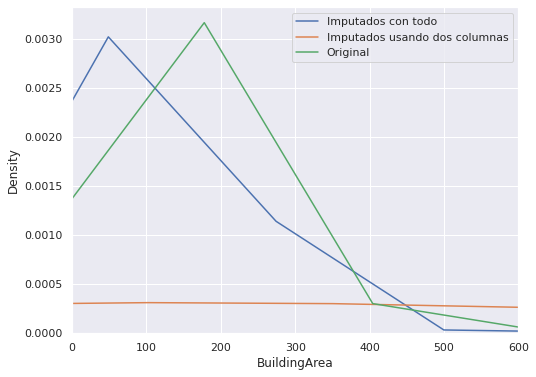

In [ ]:
ax = seaborn.kdeplot(melb_imputed_all.BuildingArea,label="Imputados con todo")
ax = seaborn.kdeplot(melb_imputed.BuildingArea,label="Imputados usando dos columnas")
ax = seaborn.kdeplot(melb_encoded.BuildingArea,label="Original")
plt.xlim((0,600))
ax.legend()

En los gráficos se observa que tanto para la variable 'YearBuilt' como para 'BuildingArea', la imputación usando sólo dos columnas genera mucha imprecisión en la estimación, en cambio, al usar los vecinos más cercanos teniendo en cuenta todas las columnas, mejora la estimación.


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
n = min(20,melb_imputed_all.shape[1])
n

20

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n)

melb_scaled = scaler.fit_transform(melb_imputed_all)
componentes = pca.fit_transform(melb_scaled)

componentes.shape

(13580, 20)

In [ ]:
pca.explained_variance_ratio_

array([0.25246362, 0.15461186, 0.07466982, 0.03464949, 0.0235016 ,
       0.01527895, 0.01375716, 0.01226515, 0.01156395, 0.01117339,
       0.01083062, 0.01034302, 0.00972647, 0.00955464, 0.00946227,
       0.00920311, 0.00910563, 0.00862209, 0.00844347, 0.00828954])

In [ ]:
sum(pca.explained_variance_ratio_)

0.6975158384093453

Text(0.5, 0, 'Componentes')

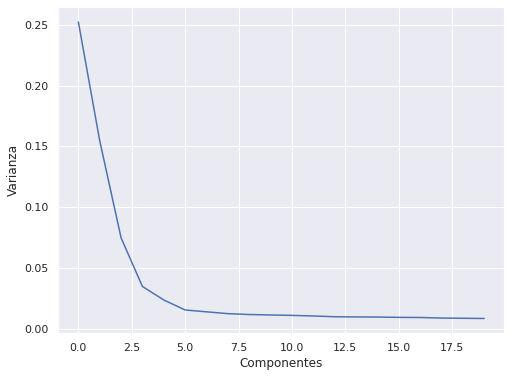

In [ ]:
ax = seaborn.lineplot(x=range(pca.n_components),y=pca.explained_variance_ratio_)
#ax.set(yscale='log')
plt.ylabel("Varianza")
plt.xlabel("Componentes")
#ax.legend()

In [ ]:
sum(pca.explained_variance_ratio_[0:6])

0.5551753342322925

**Agregamos las 6 primeras componentes de PCA** para abarcar el 55% de la varianza.

In [ ]:
for i in range(6):
  melb_imputed_all[f"PCA{i}"] = componentes[:,i]

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
final_melb = melb_imputed_all.drop(encoder.get_feature_names_out().tolist(), axis=1)
final_melb

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,environment_price,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5
0,3.0,840000.0,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,65.0,0.525633,-0.162029,1.093035,-0.151326,-0.182965,0.011454
1,3.0,730000.0,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,65.0,-0.302458,-0.370679,-0.030604,-0.203567,-0.201783,0.012091
2,3.0,770000.0,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,65.0,-0.302658,-0.370841,-0.030570,-0.203789,-0.201187,0.012527
3,2.0,603000.0,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,65.0,-0.284680,-0.368948,-0.043069,-0.200803,-0.214119,-0.055537
4,3.0,700000.0,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,65.0,0.521574,-0.161786,1.094619,-0.148347,-0.188689,0.034804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4.0,1330000.0,14.7,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,7082.0,68.5,-0.562746,0.545966,-0.036915,0.100589,-0.030817,0.043514
13576,2.0,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,2329.0,62.4,-0.536857,0.586835,-0.042144,-0.063692,-0.136219,-0.107174
13577,4.0,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,68.0,-0.531080,0.476089,-0.061473,0.427149,0.027723,-0.040993
13578,3.0,582000.0,16.5,3049.0,3.0,2.0,2.0,256.0,114.2,1994.8,2474.0,70.2,-0.559298,0.586478,-0.029375,-0.061744,-0.106950,-0.009466


In [ ]:
#como ya es un dataframe, solo lo guardamos en csv
final_melb.to_csv("result.csv")

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
